# Blackboard for objects

In [2]:
import nbimporter
from teams import Team, Match
from players import Player
from utils import FIFA
from collections import defaultdict
import numpy as np

Importing Jupyter notebook from teams.ipynb
Importing Jupyter notebook from players.ipynb
Importing Jupyter notebook from utils.ipynb


In [ ]:
football = '../data/fifa/fifa_2018.csv'
data = FIFA.load(football)

In [ ]:
H = Team('Juventus', data)
A = Team('Genoa', data)

In [ ]:
H.selection(module={Player.DEF: 4, Player.MID: 3, Player.ATT: 3})

In [ ]:
A.selection(module={Player.DEF: 4, Player.MID: 3, Player.ATT: 3})

In [ ]:
match = Match(H, A, duration=90)

In [ ]:
match.kickoff(verbose=False, sleep=0)

In [ ]:
print (match.score)
print (["{} ({}')".format(p.name, m) for m, p in match.scorers])

## Stats

In [ ]:
H = Team('Juventus', data)
A = Team('FC Barcelona', data)
H.selection(module={Player.DEF: 4, Player.MID: 3, Player.ATT: 3})
A.selection(module={Player.DEF: 4, Player.MID: 3, Player.ATT: 3})

winners = {H.name: 0, A.name: 0, 'X': 0}
scorers = defaultdict(lambda: 0)
for m in range(100):
    match = Match(H, A, duration=90)
    match.kickoff(verbose=False, sleep=0)
    if match.score[H.name] > match.score[A.name]:
        winners[H.name] += 1
    elif match.score[A.name] > match.score[H.name]:
        winners[A.name] += 1
    else:
        winners['X'] += 1
    for m, p in match.scorers:
        scorers[p.name] += 1

In [ ]:
print (winners)

In [ ]:
for k, v in sorted(scorers.items(), key=lambda x: -x[1]):
    print (k, v)

# Visualization

In [3]:
football = '../data/fifa/fifa_2018.csv'
data = FIFA.load(football)
H = Team('Juventus', data)
A = Team('Napoli', data)
H.selection(module={Player.DEF: 4, Player.MID: 4, Player.ATT: 2})
A.selection(module={Player.DEF: 4, Player.MID: 3, Player.ATT: 3})

In [4]:
match = Match(H, A, duration=90)

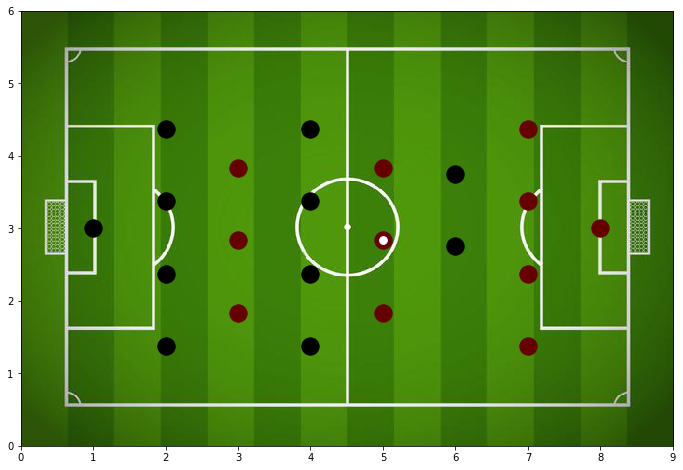

min 90: Jorginho is in possession
min 90: B. Matuidi intercept passage of Jorginho


In [6]:
match.kickoff(show=True, sleep=2, verbose=True)

In [7]:
print (match.score)

{'Juventus': 0, 'Napoli': 1}


In [8]:
print (match.scorers)

[(83, Allan, 2, A: 0.66, D: 0.8, P: 0.78)]
